In [11]:
import sys, os
from bs4 import BeautifulSoup

sys.path.append(os.pardir)
import src.scraping



..


In [13]:
html = open("../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_1_.html").read()
soup = BeautifulSoup(html, 'html.parser')
src.scraping.fetch_all(soup)


[{'name': '【閉店】喫茶室ルノアール 銀座2丁目店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/ginza-renoir-ginza2chome/',
  'category': ' コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-coffie',
   'category-tokyo',
   'category-close',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】Right-on（ライトオン）上野店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/right-on-ueno/',
  'category': ' 小売店, 東京, 洋服, 閉店情報, 関東・甲信越',
  'category_tag': ['category-shop',
   'category-tokyo',
   'category-clothing-shop',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】丸亀製麺 天王洲アイル店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/marugameseimen-tennouzu-isle/',
  'category': ' そば・うどん店, 東京, 開店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-soba_udon',
   'category-tokyo',
   'category-open',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】フジヤ時計店',
  'post_time': ' 2021-08-30',


In [17]:
import pandas as pd 
df = pd.DataFrame(src.scraping.fetch_all(soup))


In [19]:
df.head()

,name,post_time,url,category,category_tag
0,【閉店】喫茶室ルノアール 銀座2丁目店,2021-09-01,https://kaiten-heiten.com/ginza-renoir-ginza2c...,"コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-coffie, category-tokyo, category-clo..."
1,【閉店】Right-on（ライトオン）上野店,2021-09-01,https://kaiten-heiten.com/right-on-ueno/,"小売店, 東京, 洋服, 閉店情報, 関東・甲信越","[category-shop, category-tokyo, category-cloth..."
2,【閉店】丸亀製麺 天王洲アイル店,2021-09-01,https://kaiten-heiten.com/marugameseimen-tenno...,"そば・うどん店, 東京, 開店情報, 関東・甲信越, 飲食店","[category-soba_udon, category-tokyo, category-..."
3,【閉店】フジヤ時計店,2021-08-30,https://kaiten-heiten.com/fujiyatokei/,"小売店, 時計, 東京, 閉店情報, 関東・甲信越","[category-shop, category-clock, category-tokyo..."
4,【閉店】ジョーシン板橋前野店,2021-08-30,https://kaiten-heiten.com/joshin-itabashimaeno/,"家電・カメラ店, 小売店, 東京, 閉店情報, 関東・甲信越","[category-electric-shop, category-shop, catego..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          24 non-null     object        
 1   post_time     24 non-null     datetime64[ns]
 2   url           24 non-null     object        
 3   category      24 non-null     object        
 4   category_tag  24 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ KB


In [37]:
df["post_time"] = pd.to_datetime(df["post_time"])


In [58]:
def html_to_dataframe(html):
    html = open(html).read()
    soup = BeautifulSoup(html, 'html.parser')
    df = pd.DataFrame(src.scraping.fetch_all(soup))
    df["post_time"] = pd.to_datetime(df["post_time"])
    df.set_index("post_time", inplace=True)
    return df 
    

In [59]:
import glob
glob.glob('../download/【閉店】/*.html')

['../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_2_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_8_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_6_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_4_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_7_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_9_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_5_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_3_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_1_.html',
 '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_10_.html']

In [60]:
df_list = [html_to_dataframe(html) for html in glob.glob('../download/【閉店】/*.html')]
df_merged = pd.concat(df_list)


In [63]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2021-08-27 to 2021-06-19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          240 non-null    object
 1   url           240 non-null    object
 2   category      240 non-null    object
 3   category_tag  240 non-null    object
dtypes: object(4)
memory usage: 9.4+ KB


In [64]:
df_merged.resample("M").count()

,name,url,category,category_tag
post_time,,,,
2021-06-30,32,32,32,32
2021-07-31,104,104,104,104
2021-08-31,101,101,101,101
2021-09-30,3,3,3,3


In [68]:
df_merged[df_merged["category"].str.find("飲食店")>0].resample("M").count()

,name,url,category,category_tag
post_time,,,,
2021-06-30,17,17,17,17
2021-07-31,43,43,43,43
2021-08-31,43,43,43,43
2021-09-30,2,2,2,2


<AxesSubplot:xlabel='post_time'>

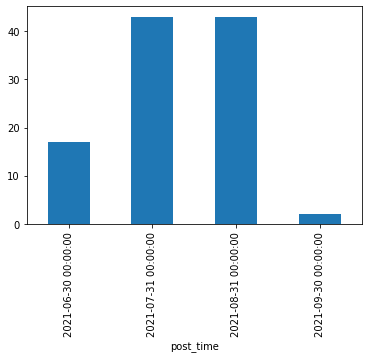

In [69]:
df_merged[df_merged["category"].str.find("飲食店")>0].resample("M").count()["name"].plot.bar()